In [150]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt

In [155]:
#path to the labeled Data of the Semester Abroad Reviews and to the three GerVader Files
path_labeledData = "Sentiment Data\subset_studium_german.xlsx"
path_neg = "GerVader Data\GERVADER__negative.csv"
path_pos = "GerVader Data\GERVADER__positive.csv"
path_neu = "GerVader Data\GERVADER__neutral.csv"

In [156]:
# Column names
column_names_labeledData = ['ID', 'Studium', 'Studium_Label', 'Studium_Comment']
column_names_GerVader = ['Studium', 'ID', 'Sentiment_GerVader', 'Sentiment_Detail_GreVader']

# Read Labeled Data
df_StudiumGerman = pd.read_excel(path_labeledData, names=column_names_labeledData)
df_StudiumGerman.dropna(subset=['Studium_Label'], inplace=True)

In [157]:
# Read GerVader Data
vader_neg = pd.read_csv(path_neg, sep=';', names=column_names_GerVader, encoding = 'utf-8', keep_default_na=False)
vader_neg['GerVader_Label'] = 'negative'
vader_neg

,Studium,ID,Sentiment_GerVader,Sentiment_Detail_GreVader,GerVader_Label
0,Ich habe mein Auslandssemester frühzeitig abbr...,15,-0.2500,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",negative
1,Das HWS geht an der UniStra von Anfang Septemb...,38,-0.4522,"{'neg': 0.077, 'neu': 0.874, 'pos': 0.049, 'co...",negative
2,"Da ich kein B2 französisch Zertifikat hatte, h...",76,-0.6997,"{'neg': 0.079, 'neu': 0.894, 'pos': 0.026, 'co...",negative
3,Meine Kurse fanden alle in der Facultad de Fil...,119,-0.1987,"{'neg': 0.057, 'neu': 0.893, 'pos': 0.05, 'com...",negative
4,"Das Studium an der KUFS ist anstrengend, zumin...",143,-0.5551,"{'neg': 0.077, 'neu': 0.864, 'pos': 0.059, 'co...",negative
5,Im Vergleich zu Mannheim ist das Niveau auf je...,147,-0.6544,"{'neg': 0.122, 'neu': 0.861, 'pos': 0.017, 'co...",negative
6,Ich hatte leider etwas Pech bei meiner Kurswah...,166,-0.4789,"{'neg': 0.12, 'neu': 0.789, 'pos': 0.091, 'com...",negative
7,Generell würde ich das Studium an der irischen...,167,-0.0948,"{'neg': 0.046, 'neu': 0.918, 'pos': 0.036, 'co...",negative
8,Das Studium an der Uni ist sehr unterschiedlic...,171,-0.5984,"{'neg': 0.06, 'neu': 0.915, 'pos': 0.025, 'com...",negative
9,"Das Studium an der KUFS ist anstrengend, zumin...",172,-0.5551,"{'neg': 0.078, 'neu': 0.863, 'pos': 0.059, 'co...",negative


In [158]:
vader_pos = pd.read_csv(path_pos, sep=';', names=column_names_GerVader, encoding = 'UTF-8')
vader_pos['GerVader_Label'] = 'positive'
vader_pos

,Studium,ID,Sentiment_GerVader,Sentiment_Detail_GreVader,GerVader_Label
0,Die Vorlesungszeit war von Anfang September bi...,0,979.0000,"{'neg': 0.016, 'neu': 0.844, 'pos': 0.14, 'com...",positive
1,Die Pazmany Universität ist sehr klein im Verg...,1,0.9907,"{'neg': 0.027, 'neu': 0.756, 'pos': 0.218, 'co...",positive
2,Da die Vorlesungen wegen der Pandemie online s...,3,0.9868,"{'neg': 0.014, 'neu': 0.86, 'pos': 0.126, 'com...",positive
3,Die City University of Hong Kong hat eine groß...,4,0.8225,"{'neg': 0.046, 'neu': 0.863, 'pos': 0.092, 'co...",positive
4,Das Studium an der NUS hat mir großen Spaß gem...,6,0.9823,"{'neg': 0.032, 'neu': 0.819, 'pos': 0.148, 'co...",positive
...,...,...,...,...,...
577,Leben auf dem Campus_x000D_\n_x000D_\nIch hatt...,855,992.0000,"{'neg': 0.018, 'neu': 0.869, 'pos': 0.113, 'co...",positive
578,Die Art des Studiums unterscheidet sich stark ...,856,0.7003,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",positive
579,"An der Sciences Po wird, anders als in Mannhei...",857,0.7425,"{'neg': 0.028, 'neu': 0.879, 'pos': 0.093, 'co...",positive
580,Eigentlich finden jedes Jahr vor dem Semester ...,858,0.9713,"{'neg': 0.063, 'neu': 0.843, 'pos': 0.094, 'co...",positive


In [159]:
vader_neu = pd.read_csv(path_neu, sep=';', names=column_names_GerVader, encoding = 'UTF-8')
vader_neu['GerVader_Label'] = 'neutral'
vader_neu

,Studium,ID,Sentiment_GerVader,Sentiment_Detail_GreVader,GerVader_Label
0,Studium,ID,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Mit der Universität selbst hatten wir wenig zu...,2,0.5282,"{'neg': 0.039, 'neu': 0.912, 'pos': 0.05, 'com...",neutral
2,Das Semester ist in kleinere Abschnitte untert...,5,0.1027,"{'neg': 0.071, 'neu': 0.873, 'pos': 0.057, 'co...",neutral
3,Das Studium an der Universität hat mir leider ...,55,0.5095,"{'neg': 0.035, 'neu': 0.888, 'pos': 0.077, 'co...",neutral
4,"Im Gegensatz zu Mannheim, gibt es an der NHH k...",56,0.1724,"{'neg': 0.05, 'neu': 0.894, 'pos': 0.056, 'com...",neutral
5,Im Gegensatz zur Uni Mannheim muss man an amer...,83,-0.0475,"{'neg': 0.055, 'neu': 0.9, 'pos': 0.044, 'comp...",neutral
6,Nicht viel anders als Mannheim bis auf: Mehr a...,88,0.1342,"{'neg': 0.031, 'neu': 0.933, 'pos': 0.035, 'co...",neutral
7,Meine Kurse fanden alle am Campus in Leioa sta...,129,0.4215,"{'neg': 0.048, 'neu': 0.88, 'pos': 0.071, 'com...",neutral
8,Die Uni bietet viele Kursen für Austauschstude...,136,0.1531,"{'neg': 0.03, 'neu': 0.921, 'pos': 0.049, 'com...",neutral
9,Das GSOM-Studium unterscheidet sich merklich v...,153,0.1801,"{'neg': 0.041, 'neu': 0.912, 'pos': 0.047, 'co...",neutral


### GerVader Evaluation

In [160]:
#Joining the data of our labels with the labels of GerVader for evaluation of the results

df_gerVader = pd.concat([vader_neu, vader_pos, vader_neg])

# Skip or remove the row with the header
df_gerVader = df_gerVader[df_gerVader['ID'] != 'ID']

# Convert the 'ID' column from string to integer format
df_gerVader['ID'] = df_gerVader['ID'].astype(int)

joined_df = pd.merge(df_StudiumGerman, df_gerVader, on='ID', how='inner')
#joined_df

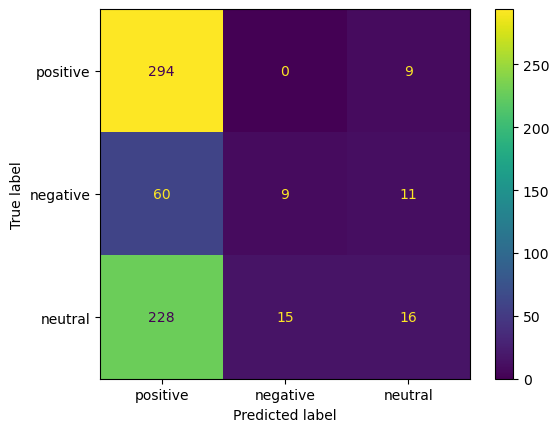

0.4968847352024922
              precision    recall  f1-score   support

    positive       0.38      0.11      0.17        80
    negative       0.44      0.06      0.11       259
     neutral       0.51      0.97      0.66       303

    accuracy                           0.50       642
   macro avg       0.44      0.38      0.32       642
weighted avg       0.46      0.50      0.38       642



In [161]:
def calculateMatch(df):
    match_count = (df['Studium_Label'] == df['GerVader_Label']).sum()
    return match_count
    
calculateMatch(joined_df)

confusion_mat = confusion_matrix(joined_df['Studium_Label'], joined_df['GerVader_Label'], labels=['positive', 'negative', 'neutral'])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['positive', 'negative', 'neutral'])
disp.plot()
plt.show()
print(f1_score(joined_df['Studium_Label'], joined_df['GerVader_Label'], labels=['positive', 'negative', 'neutral'], average='micro'))
print(classification_report(
    joined_df['Studium_Label'],
    joined_df['GerVader_Label'],
    output_dict=False,
    target_names=['positive', 'negative', 'neutral']
))